# JPK AFM data analysis for liquid samples

## Import libraries
Run this ONLY ONCE. Always restart kernel before running.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import sys
import os
from datetime import datetime
from PyQt5.QtWidgets import QApplication, QFileDialog, QListView, QTreeView, QAbstractItemView
from IPython.display import Image
import matplotlib.pyplot as plt
import wetting, surfevol

app = QApplication(sys.argv)
plt.close('all')

#function to select multiple folders from dialog
def get_directories(caption=""):
    file_dialog = QFileDialog(caption=caption)
    file_dialog.setFileMode(QFileDialog.DirectoryOnly)
    file_dialog.setOption(QFileDialog.DontUseNativeDialog, True)
    file_view = file_dialog.findChild(QListView, 'listView')

    if file_view:
        file_view.setSelectionMode(QAbstractItemView.MultiSelection)
    f_tree_view = file_dialog.findChild(QTreeView)
    if f_tree_view:
        f_tree_view.setSelectionMode(QAbstractItemView.MultiSelection)

    if file_dialog.exec():
        paths = file_dialog.selectedFiles()
    else:
        paths = []

    return paths

## Surface Evolver simulation data files

3.1038034027355366 1.5127344737126815 30
3.1038034027355366 1.633729820109833 35
3.1038034027355366 1.6323381620775121 40
3.1038034027355366 1.599330048761769 45
3.1038034027355366 1.5661481719419914 50
3.1038034027355366 1.5342636955550344 55
3.1038034027355366 1.5028050010310536 60
3.1038034027355366 1.4724465656648773 65
3.1038034027355366 1.4387805359347465 70
3.1038034027355366 1.4079121984869425 75
3.1038034027355366 1.382169131123262 80
3.1038034027355366 1.3614871902103922 85
3.1038034027355366 1.3475835347779903 90
3.5640109725236533 1.642038152564348 30
3.5640109725236533 1.615676947152333 35
3.5640109725236533 1.65035195732532 40
3.5640109725236533 1.646477612337188 45
3.5640109725236533 1.6086011526560127 50
3.5640109725236533 1.5660832573832155 55
3.5640109725236533 1.5253770988739406 60
3.5640109725236533 1.4876730101795543 65
3.5640109725236533 1.450566347608271 70
3.5640109725236533 1.413150106151013 75
3.5640109725236533 1.377224833844643 80
3.5640109725236533 1.342176

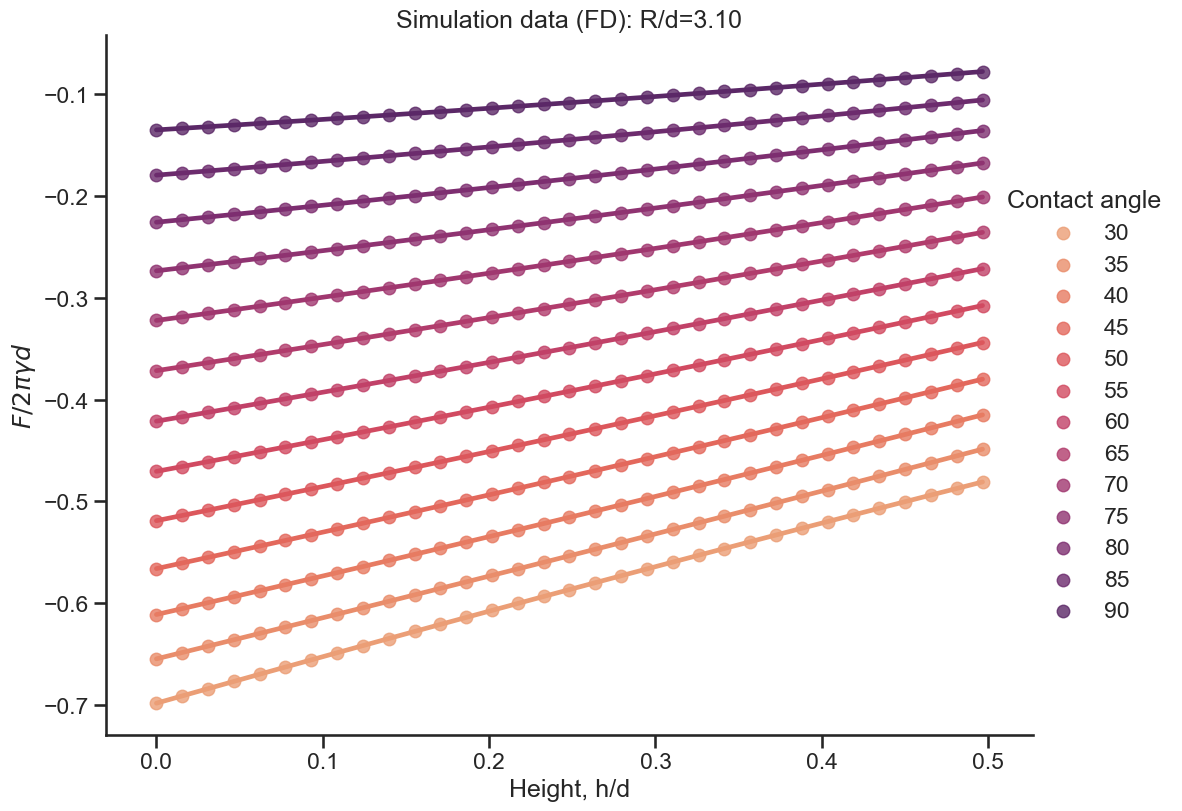

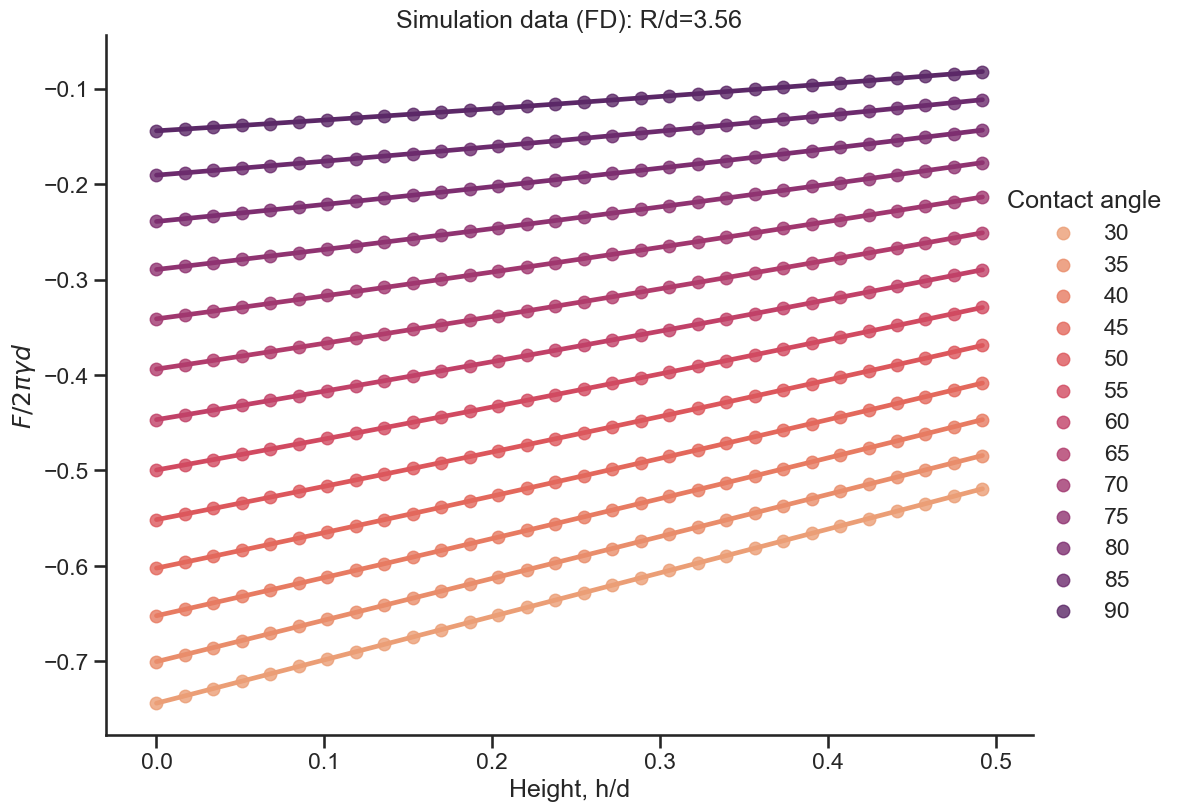

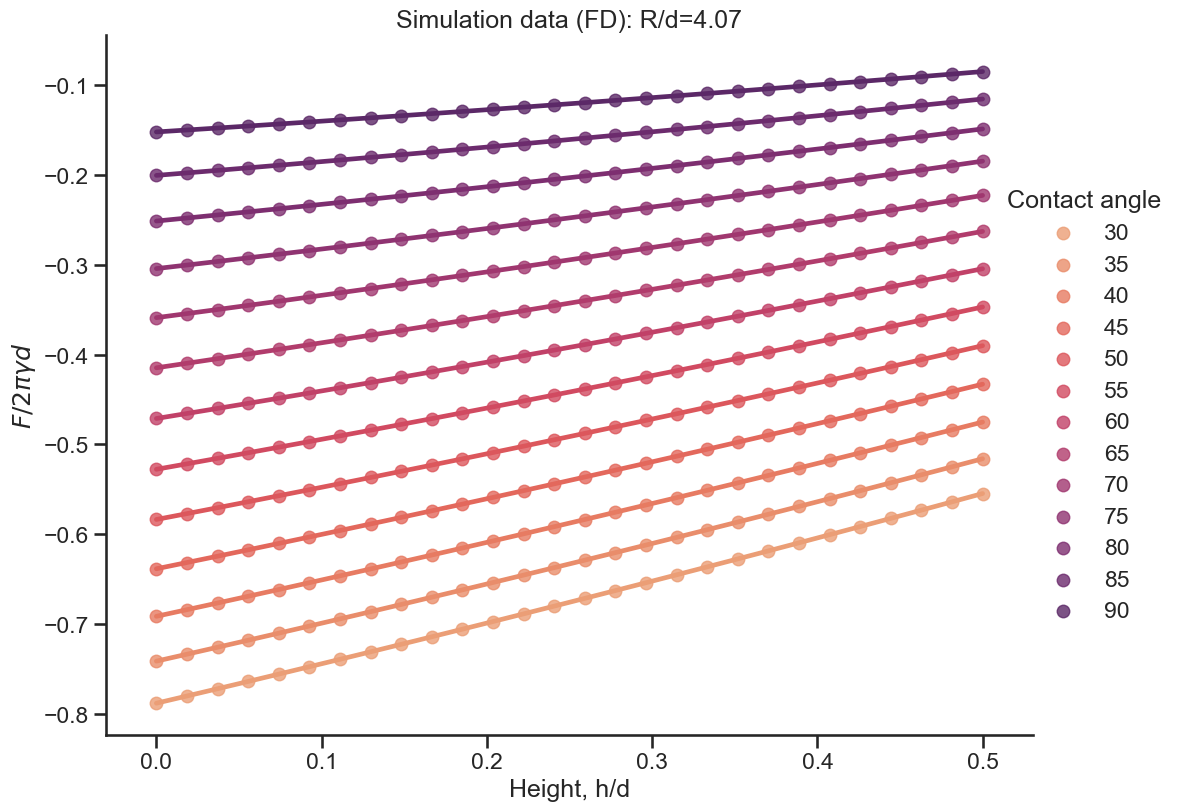

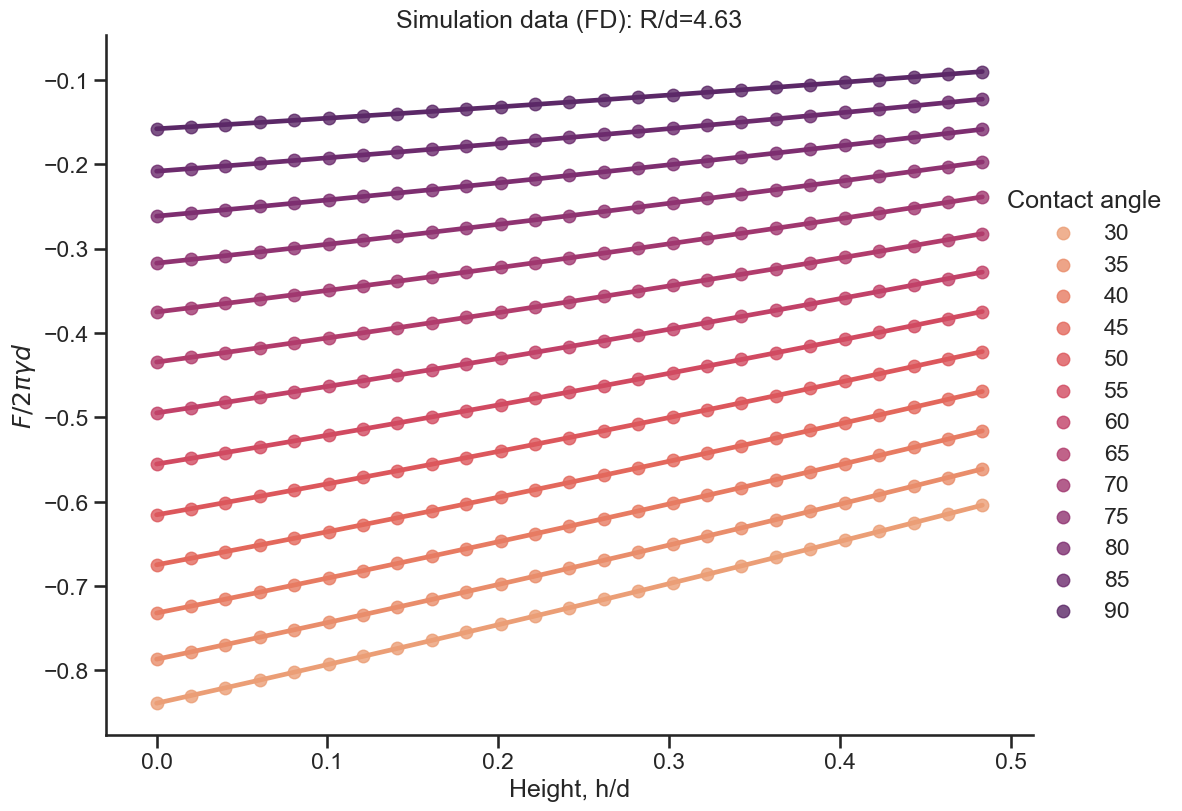

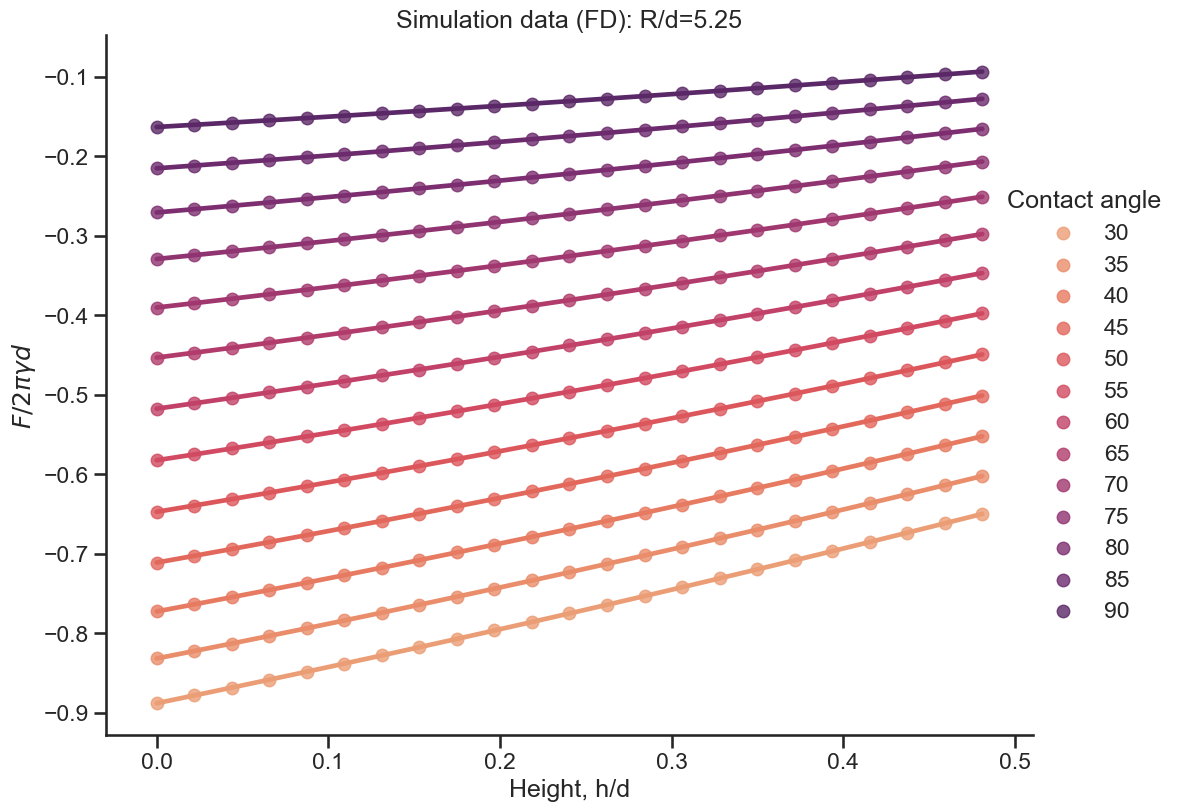

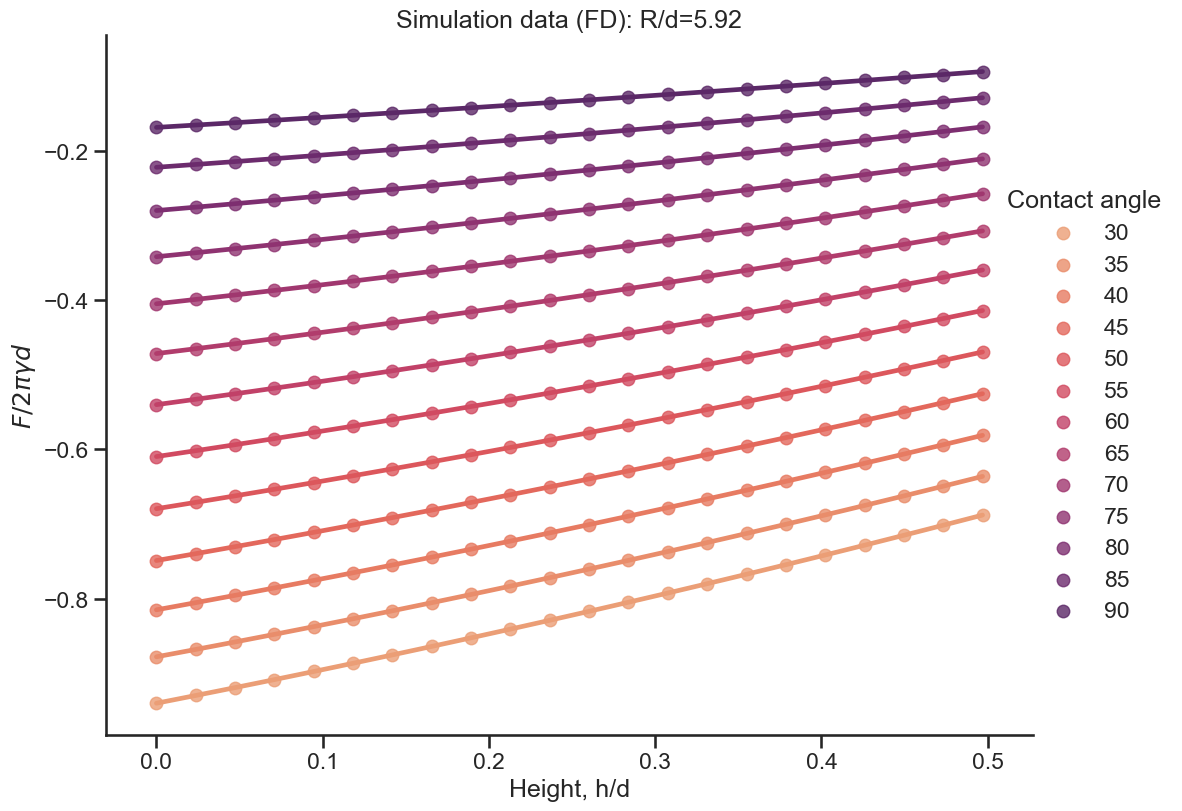

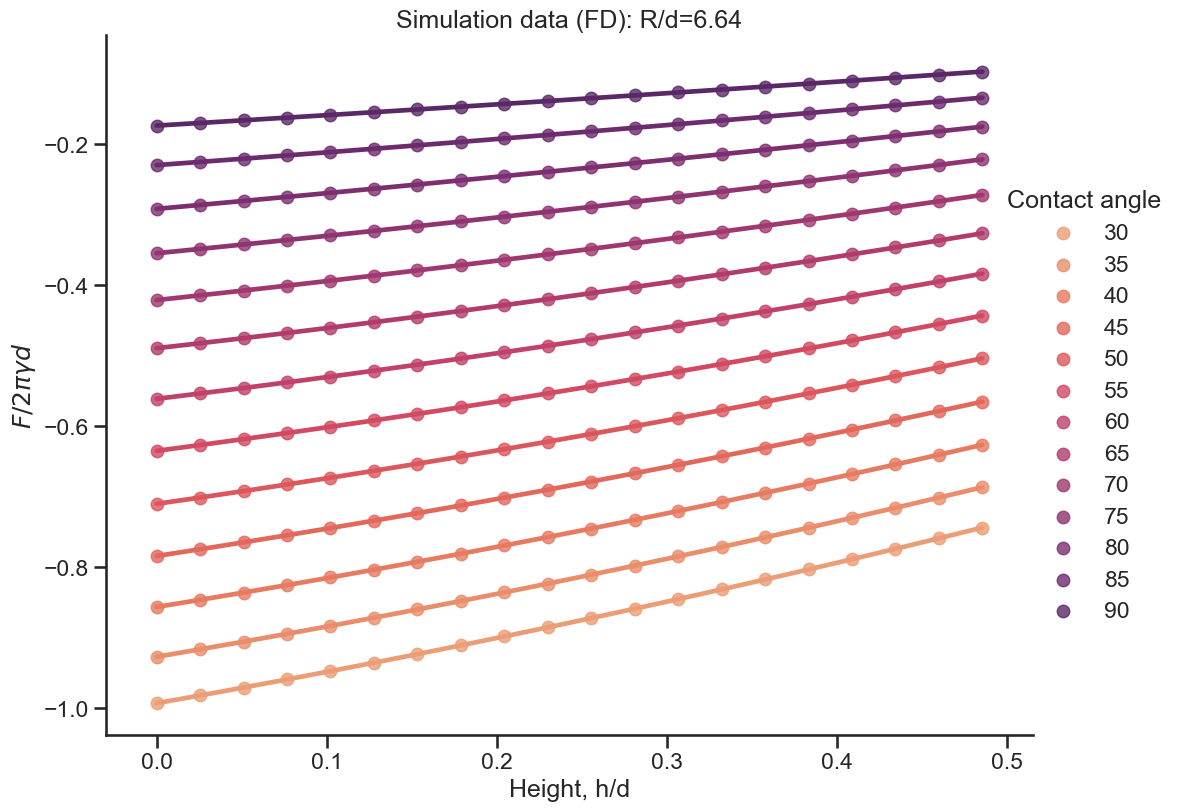

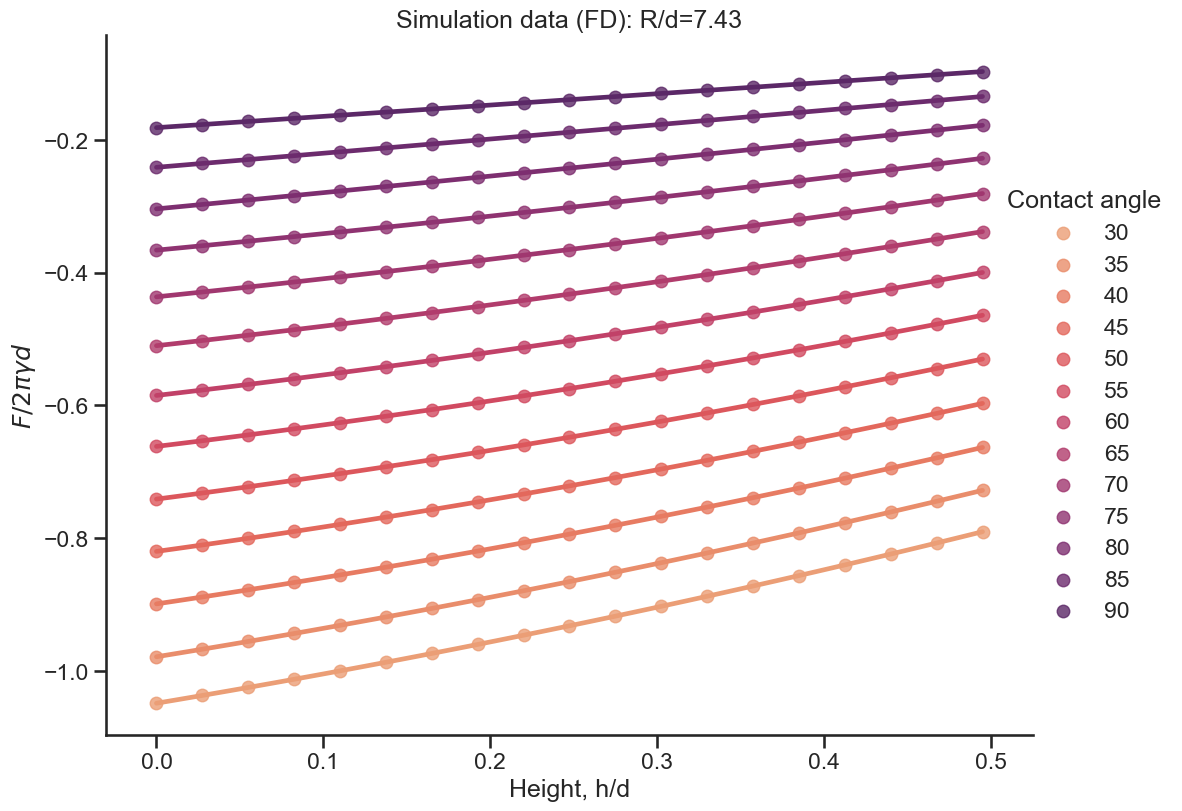

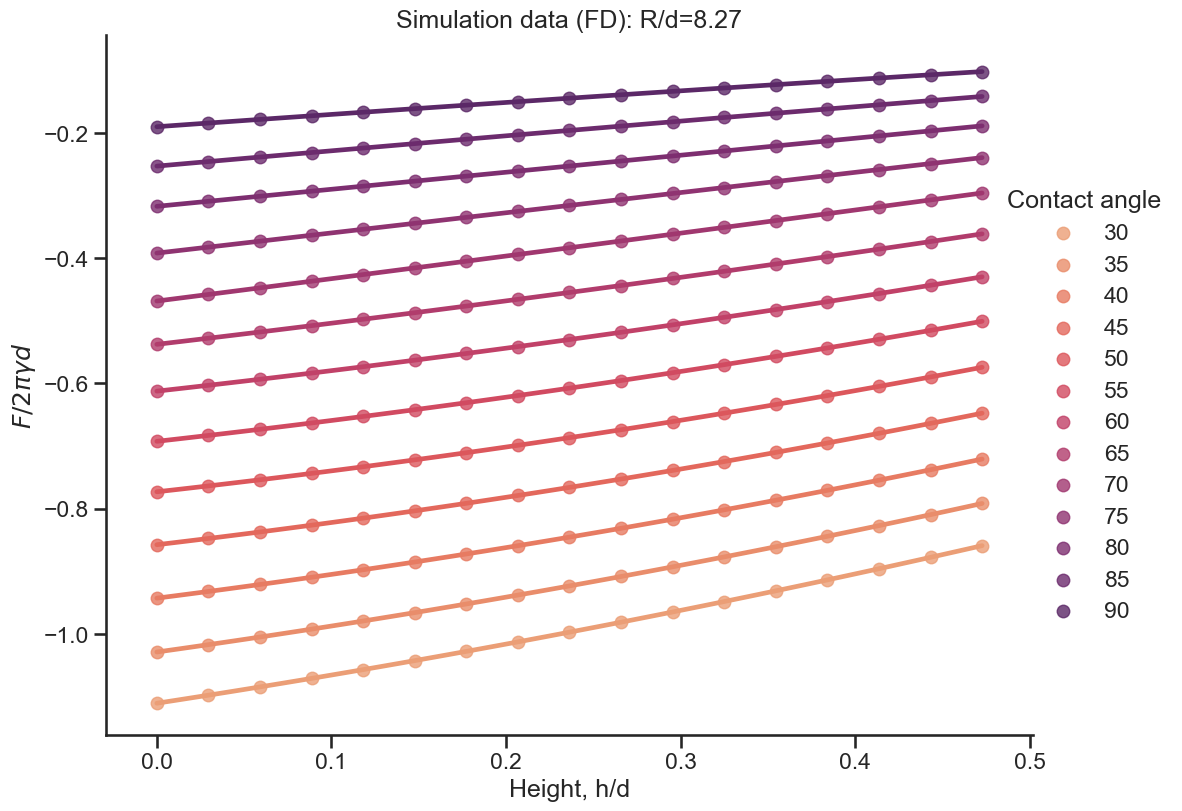

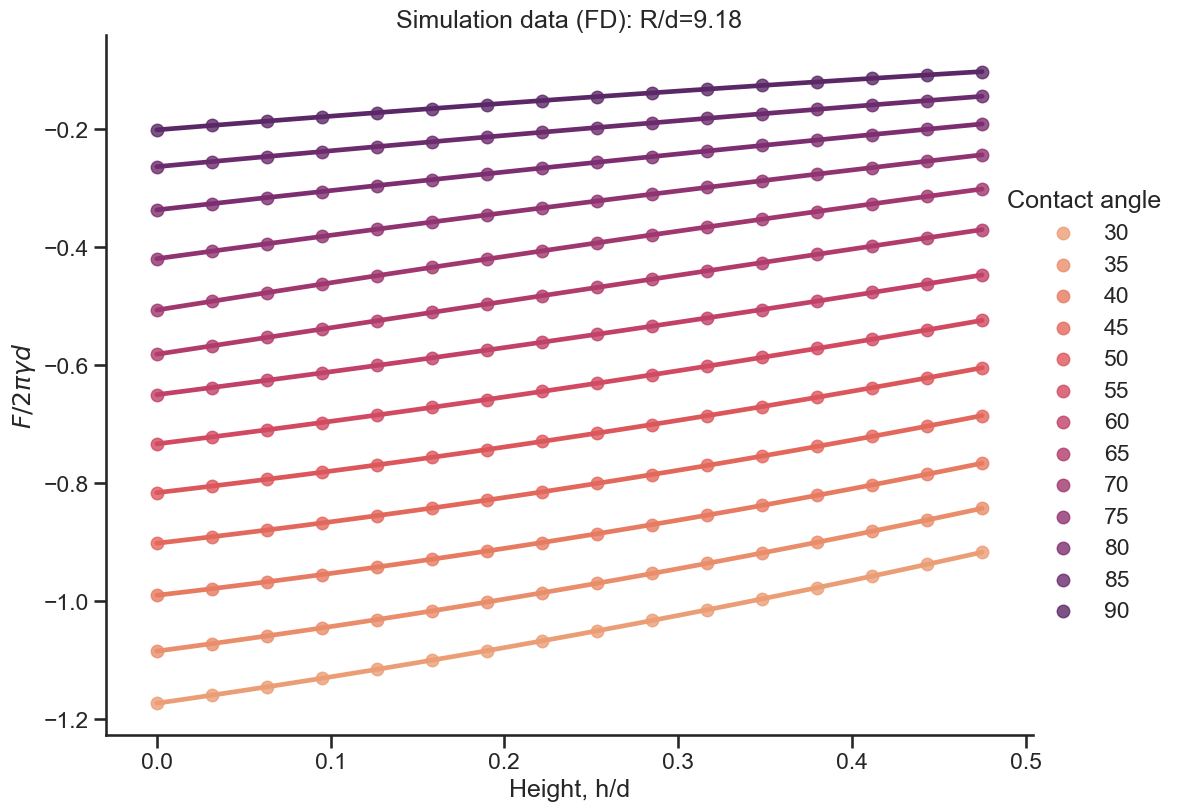

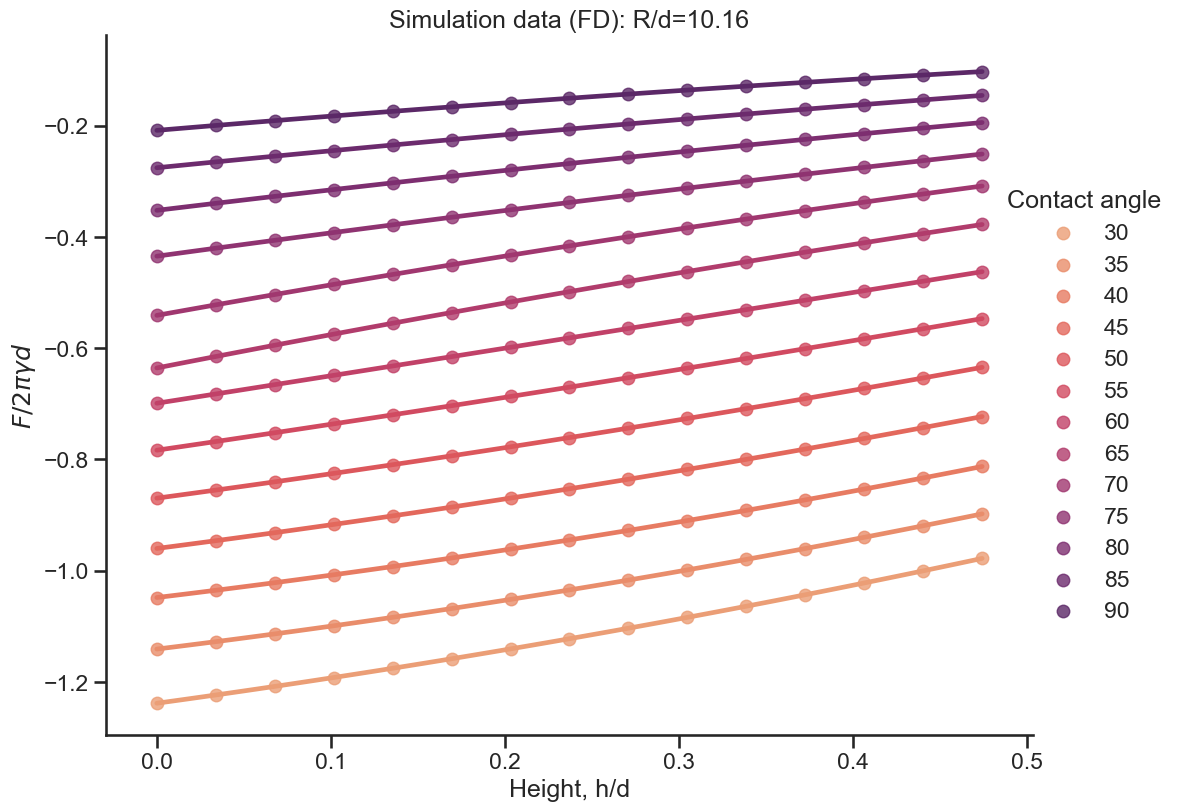

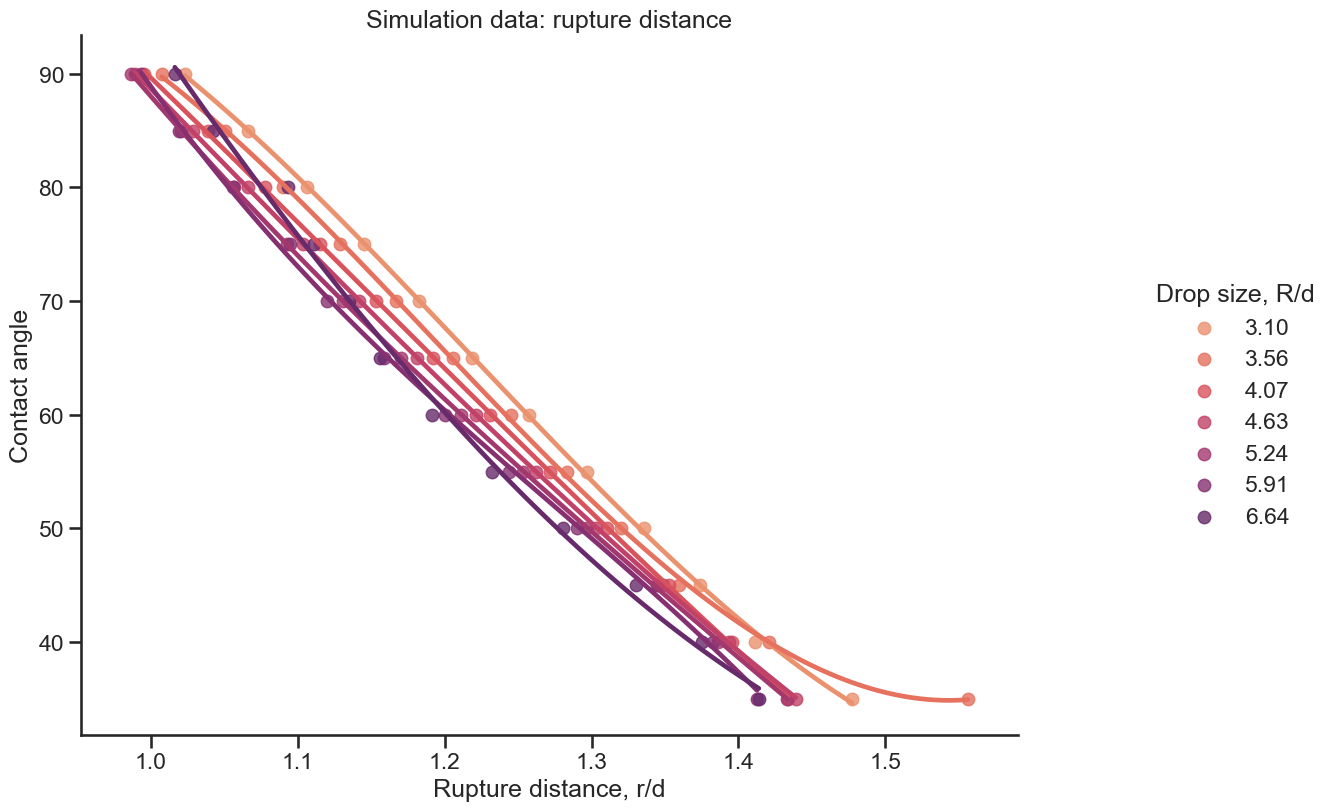

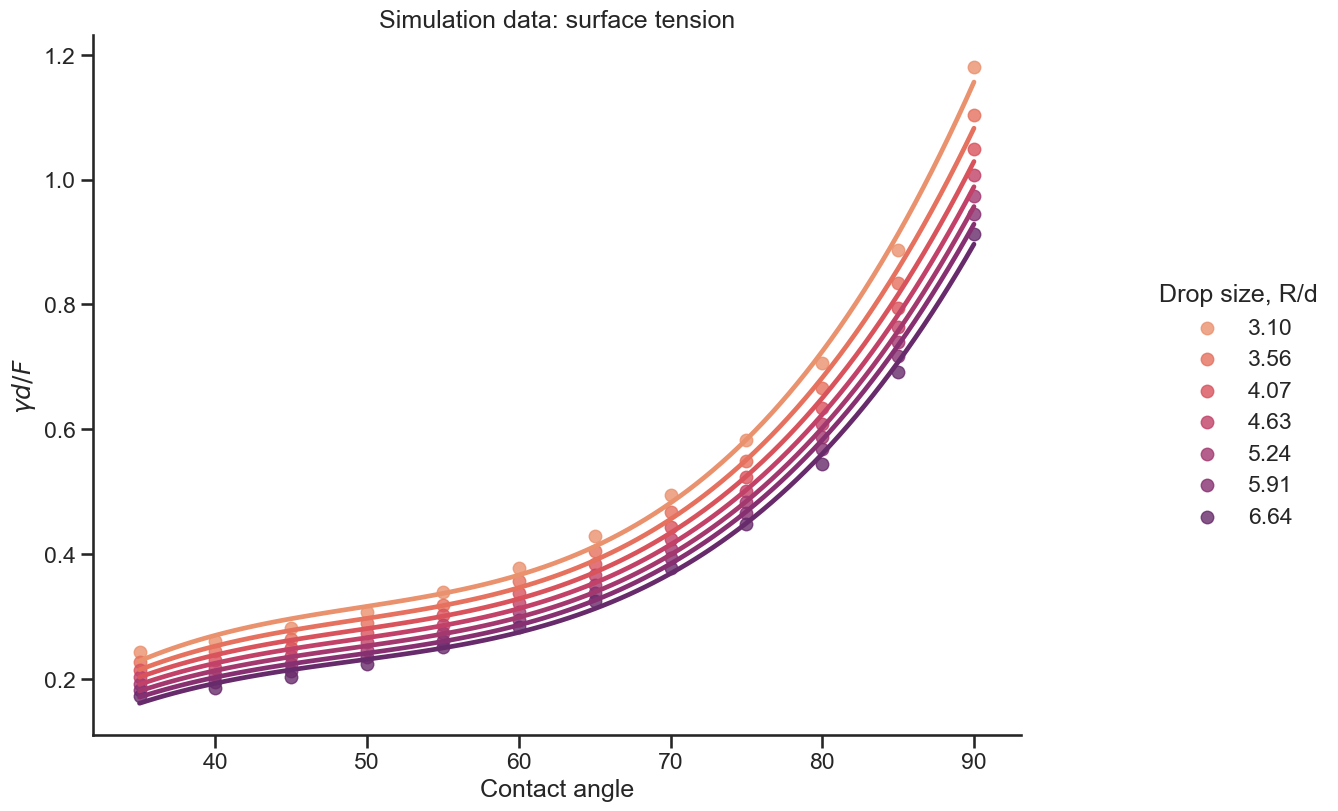

In [2]:
plt.close('all')

simu_folderpath = 'E:/Work/Surface Evolver/afm_pyramid/data/20220325_rfesp_np_fd/'

#combine simulation data for tip geometry
simu_df, simu_df_anal, fig_list = surfevol.combine_simul_dirs(simu_folderpath, plot=True)

#show plots below
for f in fig_list:
    display(f)
plt.close('all')

## JPK data raw files

In [26]:
jpk_file_paths, _ = QFileDialog.getOpenFileNames(caption='Select JPK data files') #JPK data (*.jpk,*.jpk-qi-data,*.jpk-force)
output_dir = QFileDialog.getExistingDirectory(caption='Select output data folder') #output folder
        
#separate image data and force data files
img_file_paths = []
fd_file_paths = []
for filepath in jpk_file_paths:
    file_ext = filepath.split('.')[-1]
    if file_ext in ['jpk', 'jpk-qi-data']:
        img_file_paths.append(filepath)
    elif file_ext in ['jpk-force']:
        fd_file_paths.append(filepath)
        
#make output directory
if output_dir == '':
        output_dir = os.path.dirname(jpk_file_paths[0]) + '/analysis' #default "analysis" folder
output_paths = []
for img_file_path in img_file_paths:
    file_name = os.path.basename(img_file_path)
    timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
    output_path = f'{output_dir}/{file_name}_results_{timestamp}'
    os.makedirs(output_path, exist_ok=True)
    output_paths.append(output_path)

print('Image data:\n', img_file_paths, '\nForce data:\n', fd_file_paths, '\nOutput folder:\n', output_paths)

Image data:
 ['E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/save_area3-2022.06.01-17.45.07.236.jpk'] 
Force data:
 ['E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-17.55.01.298.jpk-force', 'E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-17.57.32.807.jpk-force', 'E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-17.59.57.838.jpk-force', 'E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-18.02.29.607.jpk-force'] 
Output folder:
 ['E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/analysis/save_area3-2022.06.01-17.45.07.236.jpk_results_220601-184210']


## AFM image

Image file: E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/save_area3-2022.06.01-17.45.07.236.jpk
Output folder: E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/analysis/save_area3-2022.06.01-17.45.07.236.jpk_results_220601-184210


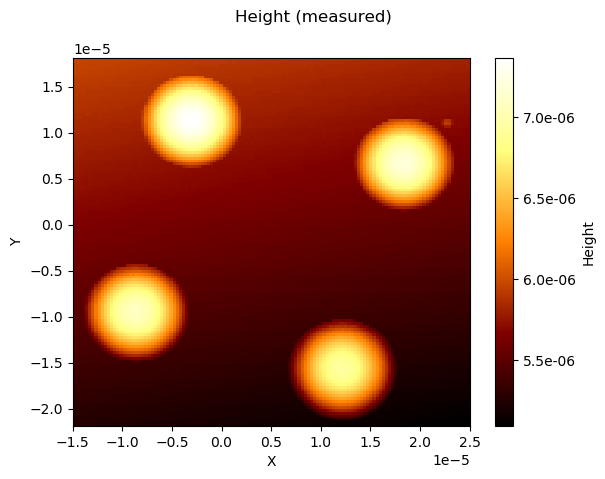

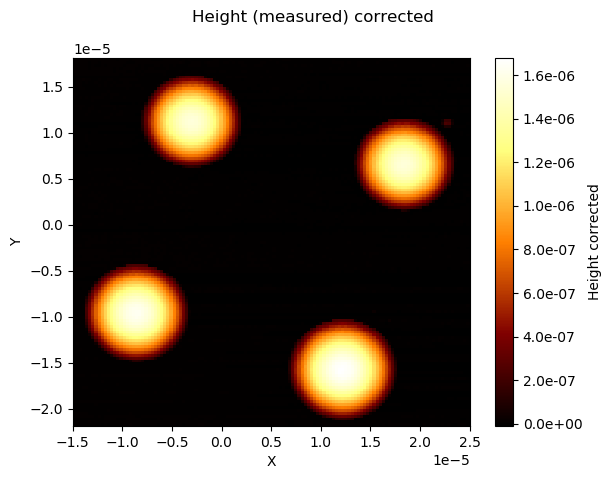

In [27]:
plt.close('all')
for img_file_path, output_path in zip(img_file_paths, output_paths):
    print('Image file:', img_file_path)
    print('Output folder:', output_path)
    afm_data, anal_data_h, fig_list =  wetting.get_afm_image(img_file_path, output_path, 
                                                             level_order=2, jump_tol=0.9)
    for fig in fig_list:
        display(fig)

plt.close('all')

## Get liquid drop properties

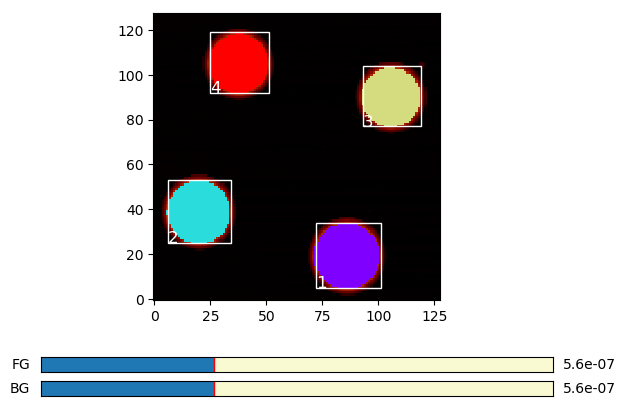

Label  Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
0      1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
1      2   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
2      3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
3      4   0.000009        0.000005    0.000002        0.000002  6.752796e-17   

     Volume raw  Drop contact angle         s       R/d  \
0  7.483750e-17           33.421812  0.000003  3.330870   
1  6.776581e-17           33.113779  0.000003  3.363675   
2  5.782893e-17           33.367951  0.000003  3.336564   
3  5.800515e-17           33.210981  0.000003  3.353260   

                                            AFM file  
0  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  
1  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  
2  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  
3  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...

In [28]:
plt.close('all')
#drop analysis of AFM data
drop_df, img_anal, fig_list = wetting.get_drop_prop(afm_data, anal_data_h, output_paths[0])
drop_df['AFM file'] = img_file_paths[0]
for fig in fig_list:
    display(fig)
display(drop_df)
plt.close('all')

## Analyze force distance curves

Force file: E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-17.55.01.298.jpk-force
rupture distance 1.3578387816004302e-06
FD wetted length: 1.6999724122756772e-06
energy 2 9.229495938138832e-14
Force file: E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-17.57.32.807.jpk-force
rupture distance 1.2517767778224567e-06
FD wetted length: 1.7651723110817032e-06
energy 1 9.617377043538516e-14
Force file: E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-17.59.57.838.jpk-force
rupture distance 1.2435774129200278e-06
FD wetted length: 1.6092391727931398e-06
energy 4 8.400352937760137e-14
Force file: E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbrushCVD/force-save_area3_drops-2022.06.01-18.02.29.607.jpk-force
rupture distance 1.2716591721276298e-06
FD wetted length: 1.6006205922066554e-06
energy 3 8.615994571735814e-14


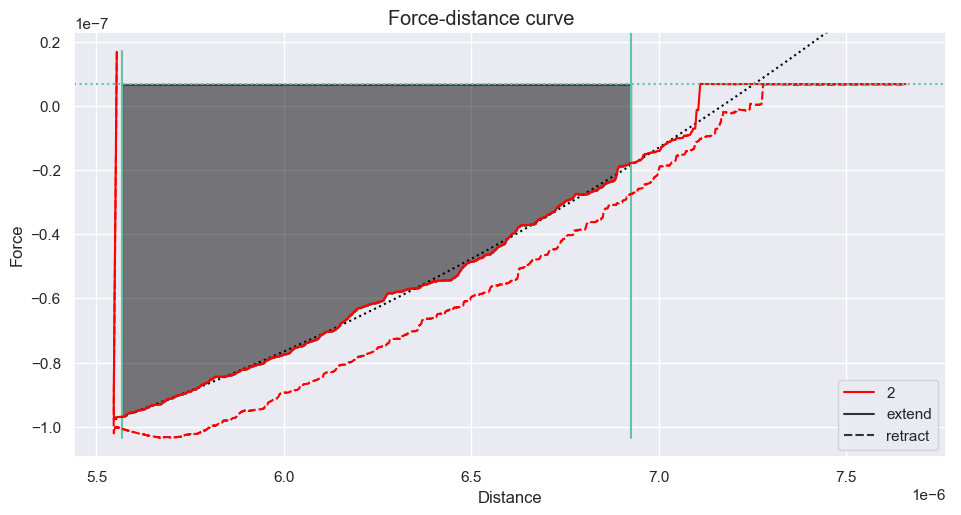

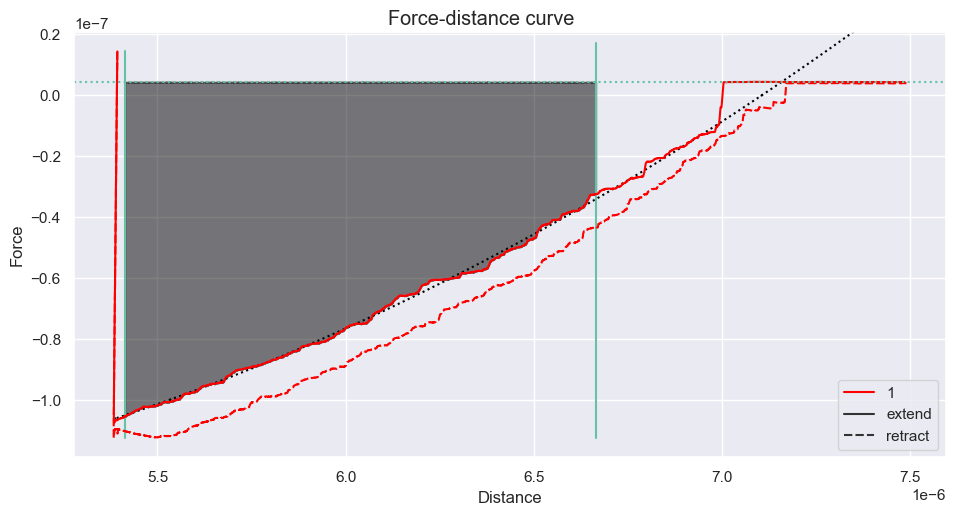

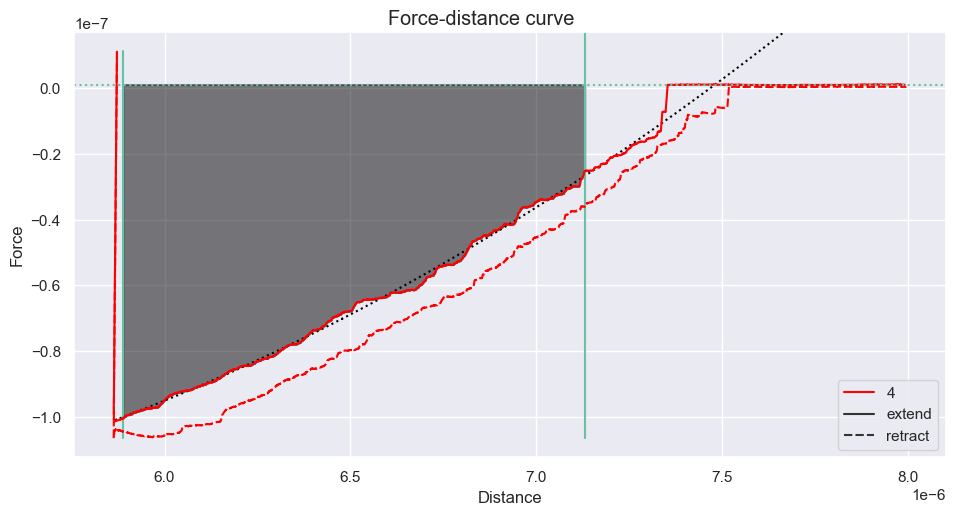

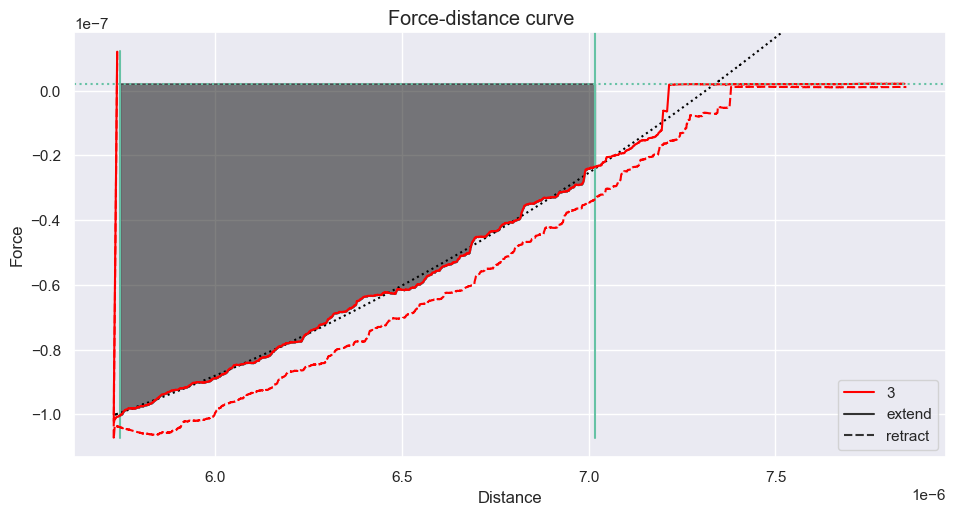

Label  Adhesion (FD)    Slope (FD)  Wetted length (FD)  \
0      2   1.046198e-07  11514.841804            0.000002   
1      1   1.115033e-07  12118.427842            0.000002   
2      4   1.025417e-07  12688.091309            0.000002   
3      3   1.046863e-07  13991.829456            0.000002   

   Rupture distance (FD)  Adhesion energy (FD)  FD X position  FD Y position  \
0               0.000001          9.229496e-14      -0.000009      -0.000010   
1               0.000001          9.617377e-14       0.000012      -0.000016   
2               0.000001          8.400353e-14      -0.000003       0.000011   
3               0.000001          8.615995e-14       0.000018       0.000006   

                                             FD file  
0  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  
1  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  
2  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  
3  E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...

In [29]:
fd_drop_df, fdfit_dict, fig_list = wetting.analyze_drop_fd(fd_file_paths, afm_data, img_anal,
                                                           force_cycle = 'approach', fit_order = 2,
                                                           output_path = output_paths[0])

for fig_path in fig_list:
    fig = Image(fig_path, width=400, height=400)
    display(fig)
display(fd_drop_df)

## Droplet surface tension calculation

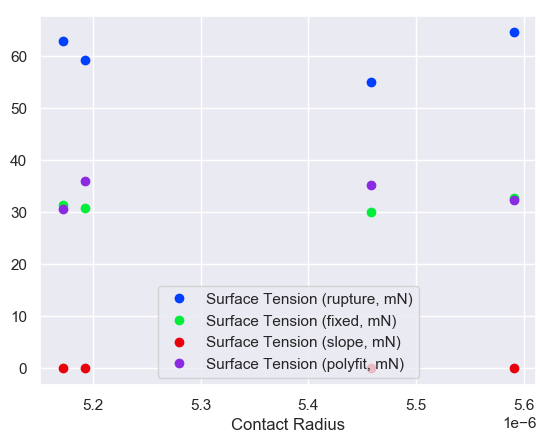

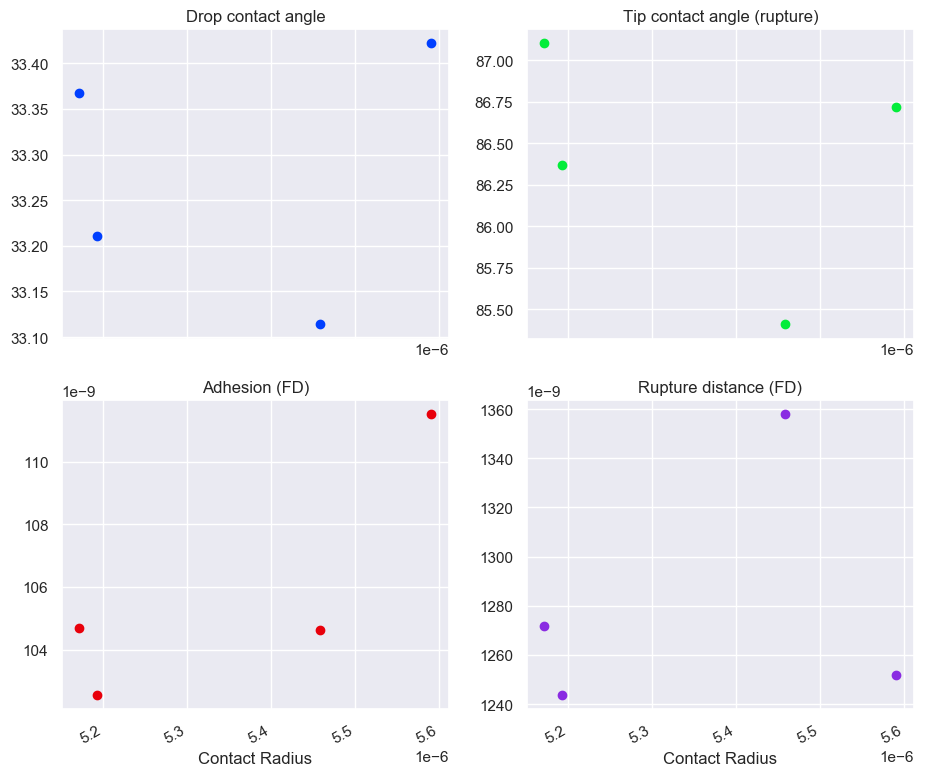

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
Label                                                                        
2       0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1       0.000010        0.000006    0.000002        0.000002  8.488249e-17   
4       0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3       0.000009        0.000005    0.000002        0.000002  6.707602e-17   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
2      6.776581e-17           33.113779  0.000003  3.363675   
1      7.483750e-17           33.421812  0.000003  3.330870   
4      5.800515e-17           33.210981  0.000003  3.353260   
3      5.782893e-17           33.367951  0.000003  3.336564   

                                                AFM file  ...  FD Y position  \
Label                                                     ...                  
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...      -0.000010   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...      -0.000016   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...       0.000011   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...       0.000006   

                                                 FD file  Simulation R/s  \
Label                                                                      
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.564011   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.103803   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.564011   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...        3.564011   

       Surface Tension (rupture, mN)  Tip contact angle (rupture)  \
Label                                                               
2                          54.950428                    85.408910   
1                          64.551956                    86.718793   
4                          59.312407                    86.367835   
3                          62.920840                    87.100215   

       F_fit_actual  Surface Tension (fixed, mN) Tip contact angle (fixed)  \
Label                                                                        
2         -0.186742                    30.068018                      70.0   
1         -0.163791                    32.810913                      70.0   
4         -0.177689                    30.881447                      70.0   
3         -0.170832                    31.496029                      70.0   

       F_fit_fixed                                    Simulation file  
Label                                                                  
2        -0.341279  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
1        -0.322241  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
4        -0.341279  E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3        -0.341279  E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 26 columns]

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
Label                                                                        
2       0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1       0.000010        0.000006    0.000002        0.000002  8.488249e-17   
4       0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3       0.000009        0.000005    0.000002        0.000002  6.707602e-17   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
2      6.776581e-17           33.113779  0.000003  3.363675   
1      7.483750e-17           33.421812  0.000003  3.330870   
4      5.800515e-17           33.210981  0.000003  3.353260   
3      5.782893e-17           33.367951  0.000003  3.336564   

                                                AFM file  ...  \
Label                                                     ...   
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...   

       Wetted length (FD)  Rupture distance (FD)  Adhesion energy (FD)  \
Label                                                                    
2                0.000002               0.000001          9.229496e-14   
1                0.000002               0.000001          9.617377e-14   
4                0.000002               0.000001          8.400353e-14   
3                0.000002               0.000001          8.615995e-14   

       FD X position  FD Y position  \
Label                                 
2          -0.000009      -0.000010   
1           0.000012      -0.000016   
4          -0.000003       0.000011   
3           0.000018       0.000006   

                                                 FD file          yd/F  \
Label                                                                    
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -1.736061e-25   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -6.314798e-26   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -1.177638e-25   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -7.963408e-26   

      Surface Tension FD (mN)  Simulation contact angle  \
Label                                                     
2               -1.119332e-23             -5.845119e+14   
1               -4.195060e-24             -6.810709e+14   
4               -7.798272e-24             -7.096921e+14   
3               -5.378284e-24             -8.630310e+14   

                                         Simulation file  
Label                                                     
2      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
1      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
4      E:/Work/Surface Evolver/afm_pyramid/data/20220...  
3      E:/Work/Surface Evolver/afm_pyramid/data/20220...  

[4 rows x 22 columns]

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
Label                                                                        
2       0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1       0.000010        0.000006    0.000002        0.000002  8.488249e-17   
4       0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3       0.000009        0.000005    0.000002        0.000002  6.707602e-17   

         Volume raw  Drop contact angle         s       R/d  \
Label                                                         
2      6.776581e-17           33.113779  0.000003  3.363675   
1      7.483750e-17           33.421812  0.000003  3.330870   
4      5.800515e-17           33.210981  0.000003  3.353260   
3      5.782893e-17           33.367951  0.000003  3.336564   

                                                AFM file  ...  FD Y position  \
Label                                                     ...                  
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...      -0.000010   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...      -0.000016   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...       0.000011   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr...  ...       0.000006   

                                                 FD file          yd/F  \
Label                                                                    
2      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -1.736061e-25   
1      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -6.314798e-26   
4      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -1.177638e-25   
3      E:/Work/AFM/20220601 mineral oil_RFESPA_pdmsbr... -7.963408e-26   

       Surface Tension FD (mN)  Simulation contact angle  \
Label                                                      
2                -1.119332e-23             -5.845119e+14   
1                -4.195060e-24             -6.810709e+14   
4                -7.798272e-24             -7.096921e+14   
3                -5.378284e-24             -8.630310e+14   

                                         Simulation file  \
Label                                                      
2      E:/Work/Surface Evolver/afm_pyramid/data/20220...   
1      E:/Work/Surface Evolver/afm_pyramid/data/20220...   
4      E:/Work/Surface Evolver/afm_pyramid/data/20220...   
3      E:/Work/Surface Evolver/afm_pyramid/data/20220...   

       Surface Tension (error min, mN) Tip contact angle (error min)  \
Label                                                                  
2                            35.282717                          75.0   
1                            32.334403                          70.0   
4                            36.080972                          75.0   
3                            30.721254                          70.0   

       RMSE (error min)  R square (error min)  
Label                                          
2          4.554391e-10              0.998564  
1          5.703225e-10              0.997855  
4          4.109913e-10              0.998772  
3          5.843436e-10              0.997373  

[4 rows x 26 columns]

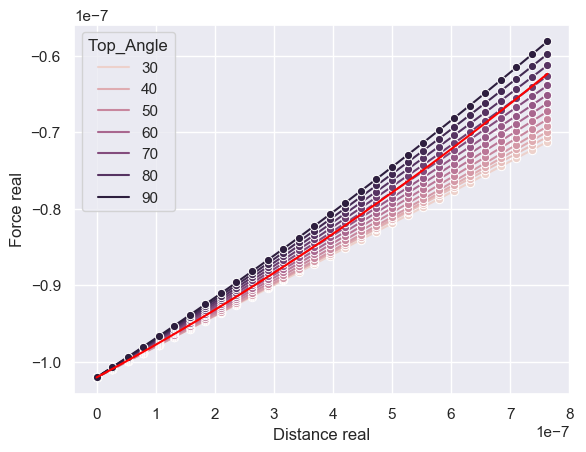

In [30]:
plt.close('all')
plt.style.use('seaborn-bright')
contact_angle = 70 #Set fixed value to calculate its corresponsing surface tension

#combine droplet image and force result data
afm_df = drop_df.set_index('Label').join(fd_drop_df.set_index('Label'), how='right')

#calculate surface tension (from rupture distance)
output_df = wetting.get_surface_tension3(afm_df, simu_df_anal,contact_angle,
                                          fd_file_paths, output_paths[0], True)

#output_df_filtered = output_df.dropna(subset=['FD file'])


# calculate surface tension from slopes of linear FD fitting
output_df2 = wetting.get_surface_tension2(afm_df, simu_df,
                                         tolerance=0.5,
                                         fd_file_paths=fd_file_paths,
                                         file_path=output_paths[0], save=True)
#output_df_filtered2 = output_df2[output_df['FD file'] != '']

# calculate surface tension by complete FD fitting using 2nd order poly approximation
output_df3, fig = wetting.get_surface_tension4(afm_df, simu_df, fdfit_dict,
                                              file_path=output_paths[0], save=True)

ax = output_df.plot(x='Contact Radius', y=['Surface Tension (rupture, mN)','Surface Tension (fixed, mN)'],
                             marker = "o", ls="")
ax.plot(output_df2['Contact Radius'],output_df2['Surface Tension FD (mN)'],
        label="Surface Tension (slope, mN)", marker = "o", ls="")
ax.plot(output_df3['Contact Radius'],output_df3['Surface Tension (error min, mN)'],
        label="Surface Tension (polyfit, mN)", marker = "o", ls="")
ax.legend()

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig1 = ax.get_figure()
display(fig1)
fig1.savefig(f'{output_paths[0]}/surface_tension.png', bbox_inches = 'tight',
             transparent = False)

plot_vars = ['Drop contact angle','Tip contact angle (rupture)',
             'Adhesion (FD)', 'Rupture distance (FD)']
ax = output_df.plot(x='Contact Radius', y=plot_vars,title = plot_vars,
                             marker = "o", ls="", subplots=True, layout=(2,2), figsize=(11,10),
                             legend=False)
#number formatting
ax[1][0].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='y', style='sci', scilimits=(-9,-9))
ax[1][1].ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig2 = ax[0][0].get_figure()
display(fig2)
fig2.savefig(f'{output_paths[0]}/other_results.png', bbox_inches = 'tight',
             transparent = False)

display(output_df)
display(output_df2)
display(output_df3)
display(fig)
plt.close('all')

## Combine results from different folders

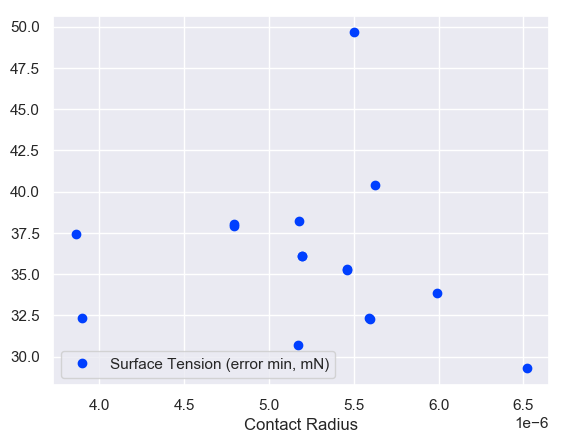

Curvature  Contact Radius  Max Height  Max Height raw        Volume  \
0   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
2   0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
0   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
2   0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
0   0.000010        0.000005    0.000002        0.000002  7.816619e-17   
1   0.000010        0.000006    0.000002        0.000002  8.488249e-17   
2   0.000009        0.000005    0.000002        0.000002  6.752796e-17   
3   0.000009        0.000005    0.000002        0.000002  6.707602e-17   
0   0.000010        0.000005    0.000002        0.000002  7.820079e-17   
1   0.000010        0.000006    0.000002        0.000002  8.507989e-17   
2   0.000009        0.000005    0.000002        0.000002  6.758540e-17   
3   0.000009        0.000005    0.000002        0.000002  6.739428e-17   
0   0.000010        0.000005    0.000002        0.000002  7.820079e-17   
1   0.000010        0.000006    0.000002        0.000002  8.507989e-17   
2   0.000009        0.000005    0.000002        0.000002  6.758540e-17   
3   0.000009        0.000005    0.000002        0.000002  6.739428e-17   
0   0.000010        0.000005    0.000002        0.000002  7.820079e-17   
1   0.000010        0.000006    0.000002        0.000002  8.507989e-17   
2   0.000009        0.000005    0.000002        0.000002  6.758540e-17   
3   0.000009        0.000005    0.000002        0.000002  6.739428e-17   
0   0.000009        0.000005    0.000001        0.000001  5.502676e-17   
1   0.000008        0.000005    0.000002        0.000002  5.606868e-17   
2   0.000007        0.000004    0.000001        0.000001  2.899555e-17   
3   0.000007        0.000004    0.000001        0.000001  2.864255e-17   
0   0.000009        0.000005    0.000001        0.000001  5.502676e-17   
1   0.000008        0.000005    0.000002        0.000002  5.606868e-17   
2   0.000007        0.000004    0.000001        0.000001  2.899555e-17   
3   0.000007        0.000004    0.000001        0.000001  2.864255e-17   
0   0.000009        0.000005    0.000001        0.000001  5.502676e-17   
1   0.000008        0.000005    0.000002        0.000002  5.606868e-17   
2   0.000007        0.000004    0.000001        0.000001  2.899555e-17   
3   0.000007        0.000004    0.000001        0.000001  2.864255e-17   
0   0.000009        0.000006    0.000002        0.000002  8.738760e-17   
1   0.000010        0.000006    0.000002        0.000002  1.120915e-16   
2   0.000010        0.000006    0.000002        0.000002  9.430984e-17   
3   0.000011        0.000007    0.000002        0.000002  1.465906e-16   
0   0.000009        0.000006    0.000002        0.000002  8.738760e-17   
1   0.000010        0.000006    0.000002        0.000002  1.120915e-16   
2   0.000010        0.000006    0.000002        0.000002  9.430984e-17   
3   0.000011        0.000007    0.000002        0.000002  1.465906e-16   
0   0.000009        0.000006    0.000002        0.000002  8.738760e-17   
1   0.000010        0.000006    0.000002        0.000002  1.120915e-16   
2   0.000010        0.000006    0.000002        0.000002  9.430984e-17   
3   0.000011        0.000007    0.000002        0.000002  1.465906e-16   

     Volume raw  Drop contact angle         s       R/d  \
0  6.776581e-17           33.113779  0.000003  3.363675   
1  7.483750e-17           33.421812  0.000003  3.330870   
2  5.800515e-17           33.210981  0.000003  3.353260   
3  5.782893e-17           33.367951  0.000003  3.336564   
0  6.776581e-17           33.113779  0.000003  3.363675   
1  7.483750e-17       

In [34]:
plt.close('all')
folder_paths = get_directories("Select analysis result folder (containing output Excel file)")
summary_df = wetting.combine_result_spreadsheets(folder_paths)
summary_df = summary_df[summary_df['FD file'] != '']

surf_ten_label = 'Surface Tension (error min, mN)' #'Surface Tension (fixed, mN)', 'Surface Tension (rupture, mN)', 'Surface Tension FD (mN)'
summary_df = summary_df[summary_df[surf_ten_label] != 0]
timestamp = datetime.today().strftime('%y%m%d-%H%M%S')
summary_df.to_excel(f'{output_dir}/summary_data_{surf_ten_label}_{timestamp}.xlsx', index=None)

ax = summary_df.plot(x='Contact Radius', 
                     y=[surf_ten_label],
                     marker = "o", ls="")

ax.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))
#show and save plot
fig3 = ax.get_figure()
fig2.savefig(f'{output_dir}/summary_plot_{surf_ten_label}_{timestamp}.png', bbox_inches = 'tight',
             transparent = False)
display(fig3)
display(summary_df)
plt.close('all')

## Combine multiple FD curves

In [67]:
# combine multiple fd curves
output_path = ''
fd_file_paths, _ = QFileDialog.getOpenFileNames()
wetting.combine_fd(fd_file_paths, zero_shift=True, 
                   output_dir=output_path,save=False)
#wetting.get_adhesion_from_fd(fd_file_paths)

## Optional codes

In [ ]:
# calculate contact angle from fd curve
label = 5 #INPUT
label_df = drop_df[drop_df['Label']==label]
s = label_df['s'].iloc[0]
R = round(label_df['R/s'].iloc[0])
contact_angle = wetting.get_contact_angle(fd_file_paths[0], simu_df,
                                         R, s, fit_index=5000)

